In [12]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#cargamos los datos de entrada
df = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train.csv",index_col=0,sep=",")
#veamos cuantas dimensiones y registros contiene

## Descripción básica del dataset

In [13]:
df.head(5)

,hors,ws,wd,anno,mes,dia,horsObs,wp1
0,1,2.47,108.68,2009,7,1,0,0.085
1,2,2.40,114.31,2009,7,1,0,0.020
2,3,2.51,118.71,2009,7,1,0,0.060
3,4,2.73,120.86,2009,7,1,0,0.045
4,5,2.93,120.13,2009,7,1,0,0.035


## Descripción filas y columnas

In [14]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (93672, 8)
Nombre columnas: Index(['hors', 'ws', 'wd', 'anno', 'mes', 'dia', 'horsObs', 'wp1'], dtype='object')


## Columnas, tipo de datos y nulos

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93672 entries, 0 to 104831
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   hors     93672 non-null  int64  
 1   ws       93672 non-null  float64
 2   wd       93672 non-null  float64
 3   anno     93672 non-null  int64  
 4   mes      93672 non-null  int64  
 5   dia      93672 non-null  int64  
 6   horsObs  93672 non-null  int64  
 7   wp1      93672 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 6.4 MB


## Descripción estadística de los datos numéricos

In [16]:
df.describe()

,hors,ws,wd,anno,mes,dia,horsObs,wp1
count,93672.000000,93672.000000,93672.000000,93672.000000,93672.000000,93672.000000,93672.000000,93672.000000
mean,25.691391,4.072487,144.814262,2010.392390,6.644632,15.695491,5.998463,0.251717
std,13.802148,1.889861,93.518468,0.950153,3.451082,8.787027,6.000032,0.217258
min,1.000000,0.010000,0.020000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,14.000000,2.750000,72.920000,2010.000000,4.000000,8.000000,0.000000,0.080000
50%,26.000000,3.680000,122.630000,2010.000000,7.000000,16.000000,0.000000,0.251717
75%,38.000000,5.110000,197.180000,2011.000000,10.000000,23.000000,12.000000,0.316000
max,48.000000,15.810000,359.990000,2012.000000,12.000000,31.000000,12.000000,0.947000


## Correlación entre variables

In [17]:
df.corr()

,hors,ws,wd,anno,mes,dia,horsObs,wp1
hors,1.000000,-0.017601,-0.006819,0.084917,-0.028614,-0.001173,0.000133,0.004997
ws,-0.017601,1.000000,-0.159404,-0.000383,-0.012811,0.021739,-0.005537,0.559903
wd,-0.006819,-0.159404,1.000000,-0.024264,-0.022562,0.041353,0.006862,-0.151513
anno,0.084917,-0.000383,-0.024264,1.000000,-0.454270,-0.012326,-0.000029,0.091160
mes,-0.028614,-0.012811,-0.022562,-0.454270,1.000000,0.008826,-0.000323,-0.037066
dia,-0.001173,0.021739,0.041353,-0.012326,0.008826,1.000000,-0.000519,-0.004494
horsObs,0.000133,-0.005537,0.006862,-0.000029,-0.000323,-0.000519,1.000000,-0.003028
wp1,0.004997,0.559903,-0.151513,0.091160,-0.037066,-0.004494,-0.003028,1.000000


In [18]:
df.drop(['dia','horsObs','hors'], axis=1, inplace=True)
df.head(5)

,ws,wd,anno,mes,wp1
0,2.47,108.68,2009,7,0.085
1,2.40,114.31,2009,7,0.020
2,2.51,118.71,2009,7,0.060
3,2.73,120.86,2009,7,0.045
4,2.93,120.13,2009,7,0.035


In [19]:
df.corr()

,ws,wd,anno,mes,wp1
ws,1.000000,-0.159404,-0.000383,-0.012811,0.559903
wd,-0.159404,1.000000,-0.024264,-0.022562,-0.151513
anno,-0.000383,-0.024264,1.000000,-0.454270,0.091160
mes,-0.012811,-0.022562,-0.454270,1.000000,-0.037066
wp1,0.559903,-0.151513,0.091160,-0.037066,1.000000


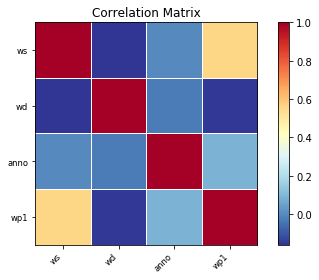

In [20]:
corr = df.set_index("mes").corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [21]:
nan_rows = df[df['wp1'].isnull()] 
nan_rows

,ws,wd,anno,mes,wp1


In [25]:
df2=df
#df2.drop(['anno','mes'], axis=1, inplace=True)
df2.head()

,ws,wd,wp1
0,2.47,108.68,0.085
1,2.40,114.31,0.020
2,2.51,118.71,0.060
3,2.73,120.86,0.045
4,2.93,120.13,0.035


## Outliers

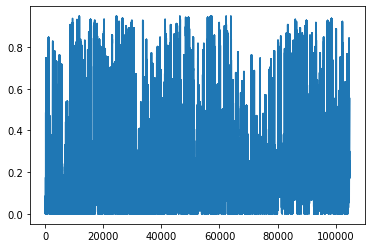

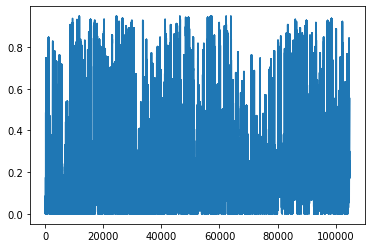

In [99]:
df.wp1.plot().get_figure()

In [72]:
def get_remov_outliers(y):
    #y = data['date']
    removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
    
    print(str(y[removed_outliers].size) + "/" + str(y.size) + " data points remain.") 
    print(removed_outliers.value_counts())
    
    
    return removed_outliers

In [73]:
def del_ouliers (rem_outl, df):
    index_names = df[~rem_outl].index # INVERT removed_outliers!!
    print(index_names) # The resulting 20 dates to drop.
    df.drop(index_names, inplace=True)

In [77]:
removed_outliers = get_remov_outliers(df['mes'])
del_ouliers(removed_outliers, df)
df.info()

60799/60799 data points remain.
True    60799
Name: mes, dtype: int64
Int64Index([], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60799 entries, 0 to 104795
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hors    60799 non-null  int64  
 1   ws      60799 non-null  float64
 2   wd      60799 non-null  float64
 3   anno    60799 non-null  int64  
 4   mes     60799 non-null  int64  
 5   wp1     60799 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.2 MB


In [120]:

df.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin.csv')


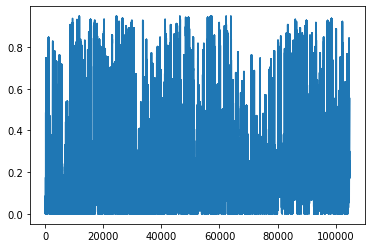

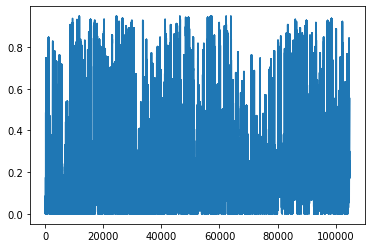

In [121]:
df.wp1.plot().get_figure()